In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-satisfaction/sample_submission.csv
/kaggle/input/santander-customer-satisfaction/train.csv
/kaggle/input/santander-customer-satisfaction/test.csv


In [59]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [60]:
X_train = pd.read_csv('/kaggle/input/santander-customer-satisfaction/train.csv')

X_test = pd.read_csv('/kaggle/input/santander-customer-satisfaction/test.csv')

In [61]:
target = X_train['TARGET']

In [62]:
target.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [63]:
# 3008/73012
print((3008/(73012+3008))*100)

3.9568534596158904


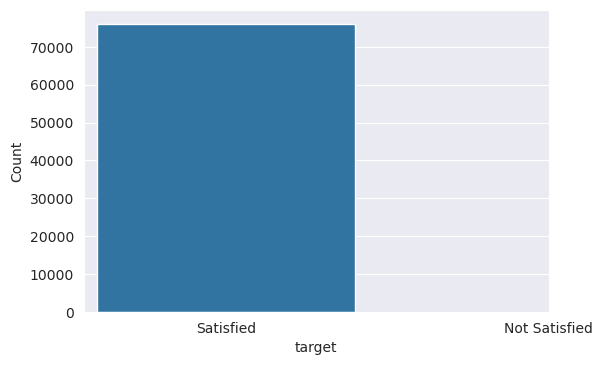

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
plt.figure(dpi=100)
sns.set_style('darkgrid')
sns.countplot(target, data=target)
plt.xlabel('target')
plt.ylabel('Count')
plt.xticks([0,1],['Satisfied','Not Satisfied'])
plt.show()

In [65]:
# drop TARGET label from X_train

X_train.drop(labels=['TARGET'], axis=1, inplace = True)

In [66]:
X_train.shape, X_test.shape

((76020, 370), (75818, 370))

In [67]:
#Checking Missing Values
X_train.isnull().sum().any()

False

In [68]:
#using sklearn variancethreshold to find constant features

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0.01)

In [69]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

273

In [70]:
# Lets Find non-constant features 
len(X_train.columns[sel.get_support()])

273

In [71]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[sel.get_support()]]

print(len(constant_columns))

97


In [72]:
for column in constant_columns:
    print(column)

ind_var1
ind_var2_0
ind_var2
ind_var6_0
ind_var6
ind_var13_largo
ind_var13_medio_0
ind_var13_medio
ind_var14
ind_var17_0
ind_var17
ind_var18_0
ind_var18
ind_var19
ind_var20_0
ind_var20
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var29_0
ind_var29
ind_var30_0
ind_var31_0
ind_var31
ind_var32_cte
ind_var32_0
ind_var32
ind_var33_0
ind_var33
ind_var34_0
ind_var34
ind_var40
ind_var41
ind_var39
ind_var44_0
ind_var44
ind_var46_0
ind_var46
num_var6_0
num_var6
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var29_0
num_var29
num_var33
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
ind_var7_emit_ult1
ind_var7_recib_ult1
num_var2_0_ult1
num_var2_ult1
num_aport_var33_hace3
num_aport_var33_ult1
num_var7_emit_ult1
num_compra_var44_hace3
num_meses_var

In [73]:
constant_columns

['ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var40',
 'ind_var41',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'ind_var46_0',
 'ind_var46',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var29_0',
 'num_var29',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb

In [74]:
X_train[['ind_var1','ind_var2']]

,ind_var1,ind_var2
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
76015,0,0
76016,0,0
76017,0,0
76018,0,0


In [75]:
X_train = X_train.drop(constant_columns,axis=1)

In [76]:
X_train.shape

(76020, 273)

In [77]:
# X_train['ind_var1']

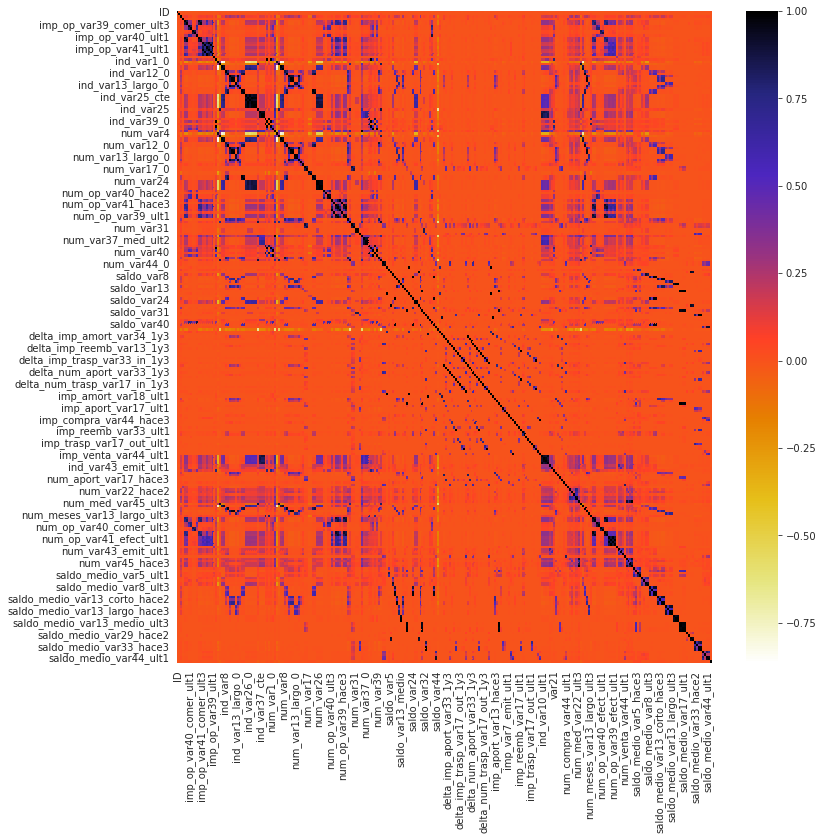

In [78]:
# 2: Feature Selection- With Correlation

import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(corrmat,cmap="CMRmap_r")

In [79]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [80]:
corr_features = correlation(X_train, 0.98)
len(set(corr_features))

68

In [81]:
corr_features

{'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_ult1',
 'imp_aport_var17_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_reemb_var33_ult1',
 'imp_trasp_var33_out_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var25',
 'ind_var26',
 'ind_var37',
 'ind_var40_0',
 'ind_var41_0',
 'num_op_var39_efect_ult1',
 'num_op_var39_efect_ult3',
 'num_op_var39_hace2',
 'num_op_var39_hace3',
 'num_op_var39_ult1',
 'num_op_var39_ult3',
 'num_var12',
 'num_var13_corto',
 'num_var13_corto_0',
 'num_var1_0',
 'num_var24',
 'num_var24_0',
 'num_var25',
 'num_var26',
 'num_var32',
 'num_var35',
 'num_

In [82]:
 # DO NOT RUN THIS AS IT TAKES A LOT OF TIME 
    # 3 :-  Checking multicoliearity 

# # Import library for VIF
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# def calc_vif(X):

#     # Calculating VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return(vif)

In [83]:
# it calculates VIF (Variable Inflation Factors).
# calc_vif(X_train)

In [84]:
X_train = X_train.drop(corr_features,axis=1)

In [85]:
X_train.shape

(76020, 205)

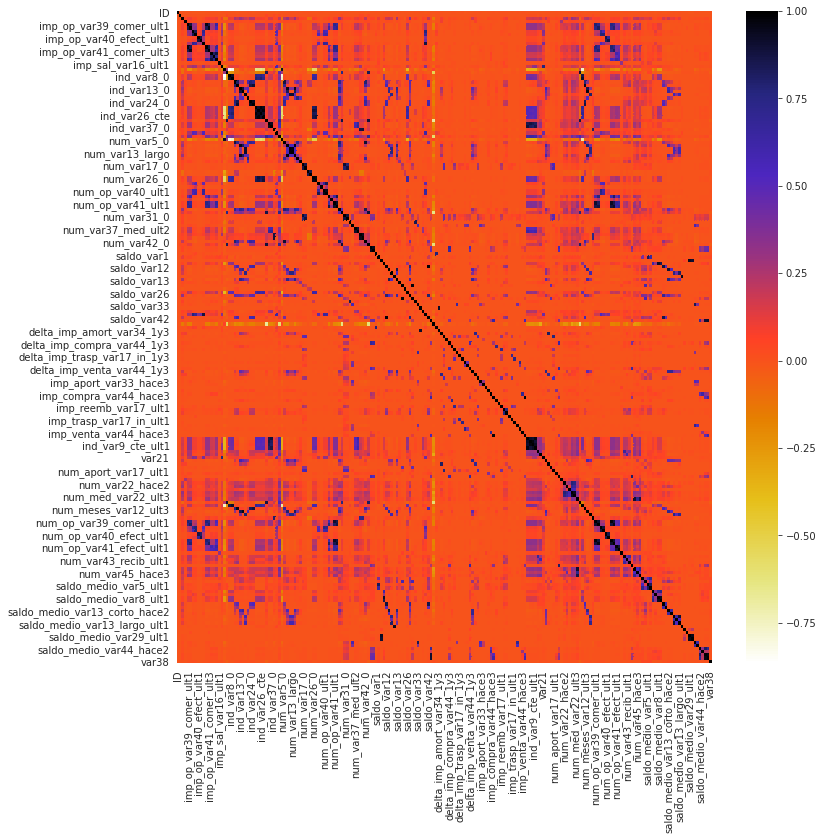

In [86]:
# sns.heatmap(X_train.corr());

corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(corrmat,cmap="CMRmap_r")

Feature Scaling

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

# X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [88]:
X_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,-1.735043,0.039074,-0.788249,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.003627,-0.004875,-0.005854,-0.017408,-0.011979,-0.01565,-0.012576,-0.018817,-0.019847,-0.427183
1,-1.734997,0.039074,0.060753,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.003627,-0.004875,-0.005854,-0.017408,-0.011979,-0.01565,-0.012576,-0.018817,-0.019847,-0.372038
2,-1.734974,0.039074,-0.788249,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.003627,-0.004875,-0.005854,-0.017408,-0.011979,-0.01565,-0.012576,-0.018817,-0.019847,-0.273191
3,-1.734883,0.039074,0.292298,-0.053388,0.361427,0.138158,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.003627,-0.004875,-0.005854,-0.017408,-0.011979,-0.01565,-0.012576,-0.018817,-0.019847,-0.291398
4,-1.734837,0.039074,0.446662,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.003627,-0.004875,-0.005854,-0.017408,-0.011979,-0.01565,-0.012576,-0.018817,-0.019847,0.000412


In [92]:
print((X_train.shape,target.shape))

((76020, 205), (76020,))


In [93]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X_train,target,test_size=0.80,random_state=0,stratify=target)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.9594


In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_train,lrm.predict(x_train))


array([[10280,  4322],
       [  161,   441]])

****Since the data is imballenced, we are now using SMOTE technique

In [97]:
# from imblearn.combine import SMOTETomek
# smk=SMOTETomek(ratio=1,random_state=0)
# x_new,y_new=smk.fit_sample(X_train,y_train)
...
# transform the dataset

from imblearn.over_sampling import SMOTE
# print(imblearn.__version__)
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, target)

In [98]:
print(X.shape,y.shape)

(146024, 205) (146024,)


In [99]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,y,test_size=0.80,random_state=0,stratify=y)

In [100]:
from sklearn.linear_model import LogisticRegression
lrm=LogisticRegression(C=0.1,penalty='l2',n_jobs=-1)
lrm.fit(x_train,y_train)

LogisticRegression(C=0.1, n_jobs=-1)

In [101]:
y_pred=lrm.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
# y_pred = pd.DataFrame(y_pred)

In [ ]:
# y_train.shape, y_pred.shape

In [102]:
from sklearn import metrics
print("Train Set Accuracy is ==> ",metrics.accuracy_score(y_train,lrm.predict(x_train)))

Train Set Accuracy is ==>  0.7316121079304205


In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_train,lrm.predict(x_train))


array([[10243,  4359],
       [ 3479, 11123]])

Logistic Regression : Lets check how our model works if web are taking all columns

PCA

In [104]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([9.30472568e-02, 6.16489672e-02, 3.79761563e-02, 3.62673589e-02,
       3.37912903e-02, 3.24215960e-02, 2.58533205e-02, 2.52656195e-02,
       2.49261702e-02, 1.95717207e-02, 1.82631273e-02, 1.73203718e-02,
       1.67324840e-02, 1.60150990e-02, 1.55269878e-02, 1.52280189e-02,
       1.41614656e-02, 1.31411498e-02, 1.26974311e-02, 1.20480210e-02,
       1.17214554e-02, 1.13322465e-02, 1.08159383e-02, 1.06812458e-02,
       1.04793498e-02, 1.02166136e-02, 9.74893771e-03, 9.59646316e-03,
       9.45925250e-03, 9.37119850e-03, 9.11940663e-03, 8.96279345e-03,
       8.67300207e-03, 8.26058691e-03, 7.55552771e-03, 7.14222542e-03,
       7.06844376e-03, 6.90490199e-03, 6.78026743e-03, 6.61291891e-03,
       6.51529865e-03, 6.34794249e-03, 6.23409312e-03, 6.09275890e-03,
       5.92711676e-03, 5.84452251e-03, 5.73198652e-03, 5.60993680e-03,
       5.30553521e-03, 5.25159829e-03, 5.19797078e-03, 5.00943172e-03,
       4.92801857e-03, 4.90388249e-03, 4.88480531e-03, 4.87727041e-03,
      

In [107]:
# plot the Cumulative Summation of the Explained Variance for the different number of components
# plt.figure()
# plt.plot(np.cumsum(X_train.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Variance (%)') #for each component
# plt.title('Dataset Explained Variance')
# plt.show()

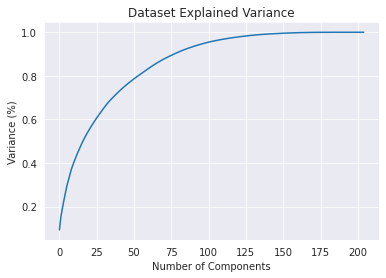

In [106]:
#  4:  PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
pca_resampled_test = PCA().fit(X_train)

# plot the Cumulative Summation of the Explained Variance for the different number of components
plt.figure()
plt.plot(np.cumsum(pca_resampled_test.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [108]:
# instantiate PCA
pca = PCA(n_components=150)

# fit PCA
principalComponents = pca.fit_transform(X_train)

In [109]:
train_pc = pd.DataFrame(data = principalComponents)
train_target = pd.Series(target, name='TARGET')

train_pc_df = pd.concat([train_pc, train_target], axis=1)
train_pc_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,TARGET
0,-2.526157,-1.335915,0.817083,-0.010605,0.999685,0.102136,-0.200075,1.674185,0.039950,1.308467,...,-0.023179,-0.004802,0.003660,-0.003040,-0.022837,-0.009267,-0.030235,-0.004315,-0.000892,0
1,-0.747101,5.440325,4.213224,1.403413,-0.782745,-0.111075,-3.354545,0.685153,2.222586,0.239189,...,0.020039,0.262611,0.042782,-0.019418,-0.047695,-0.153216,0.293649,0.169825,0.024027,0
2,-1.795157,-0.678543,-0.162881,0.088413,-0.213421,-0.060285,0.012482,-0.776601,-0.054967,-1.128767,...,-0.070810,-0.012722,-0.000793,-0.000610,-0.016204,0.020433,-0.061248,-0.014996,-0.003305,0
3,4.497419,-1.810229,-0.501174,-0.109154,-1.941770,-0.290825,0.499705,-4.912482,0.367194,5.107509,...,0.022502,-0.311036,-0.049042,0.026435,0.245084,0.031356,0.190581,0.049773,0.113741,0
4,2.823501,7.239851,-8.264692,-4.120766,3.596023,-1.527322,2.325412,2.124991,-2.550082,0.606659,...,0.415128,0.422322,0.018878,-0.050282,0.075944,-0.125496,0.740884,0.186551,0.044622,0


In [ ]:
sns.heatmap(train_pc.corr());

In [110]:
# we calculate the variance explained by priciple component
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.09304726 0.06164897 0.03797616 0.03626736 0.03379129 0.0324216
 0.02585332 0.02526562 0.02492617 0.01957172 0.01826313 0.01732037
 0.01673248 0.0160151  0.01552699 0.01522802 0.01416147 0.01314115
 0.01269743 0.01204802 0.01172146 0.01133225 0.01081594 0.01068125
 0.01047935 0.01021661 0.00974894 0.00959646 0.00945925 0.0093712
 0.00911941 0.00896279 0.008673   0.00826059 0.00755553 0.00714223
 0.00706844 0.0069049  0.00678027 0.00661292 0.0065153  0.00634794
 0.00623409 0.00609276 0.00592712 0.00584452 0.00573199 0.00560994
 0.00530554 0.0052516  0.00519797 0.00500943 0.00492802 0.00490388
 0.00488481 0.00487727 0.00485366 0.00484279 0.00482402 0.00479649
 0.00476192 0.00469753 0.00460005 0.00446731 0.00435364 0.0042263
 0.00415012 0.00407805 0.00398943 0.00388774 0.00361054 0.00354402
 0.00348282 0.0034014  0.00326805 0.00326653 0.0032335  0.00322407
 0.00315815 0.00299533 0.0029744  0.0028823  0.00283946 0.00275564
 0.00272431 0.00251017 0.00245417 0.0

Logistic regression after applying PCA

In [115]:
train_pc_df.shape , train_target.shape

((76020, 151), (76020,))

In [116]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(train_pc_df,train_target,test_size=0.80,random_state=0,stratify=train_target)

In [117]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

print('Logistic Regression accuracy score with the first 150 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 90 features: 0.9999


In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred)   

array([[58410,     0],
       [    7,  2399]])